---
title: Light
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
---

In [1]:
#| "tags": [ "hide-input",]
%matplotlib widget
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        # "figure.autolayout": True,
        # "font.family": "serif",
        # "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

# Readings
[Wikipedia article on Maxwell's Equations, Solutions in a Vacuum](https://en.wikipedia.org/wiki/Maxwell%27s_equations#Vacuum_equations,_electromagnetic_waves_and_speed_of_light)

# <span style="color: #ffff00">What is light?</span>

If we are to understand lasers and optomechanics, we must first have a solid grasp of the the nature of light.
*What is light?* is a simple question without a simple answer.

Loosely, *light* is an excitation in the electromagnetic field which permeates the universe, carrying energy and information that can be directly sensed by the human eye.
Humanity's close relationship with light drove us to study it closely, teaching us first the secrets of electromagnetism, 
then plunging us into the unintuitive world of quantum mechanics.

## The Duality of Light
Light is commonly described to be both an *electromagnetic wave* and *particle*.
This is our way of relating light to waves and particles, 
two objects humans can easily understand, 
and sweeping under the rug the complexities.
In reality, light is neither a wave nor a particle, but describing light as a complex traveling oscillation in the electromagnetic wave with indeterminant wavelength is not very useful for most people.  

A good intuition can be provided by seeing the *wave view* vs *photon view* shown in this interactive demo:
[Electromagnetic Spectrum](https://applets.kcvs.ca/ElectromagneticSpectrum/electromagneticSpectrum.html).


### Electromagnetism: The Wave Equation
Maxwell showed that light was an *electromagnetic wave*, resulting from the interplay of his famous equations in a vacuum (no charges or currents):
\begin{align}
\label{eq:maxwell_efield_dot}
\nabla \cdot \mathbb{E} &= 0
\end{align}

\begin{align}
\label{eq:maxwell_bfield_dot}
\nabla \cdot \mathbb{B} &= 0
\end{align}

\begin{align}
\label{eq:maxwell_efield}
\nabla \times \mathbb{E} &= - \dfrac{\partial \mathbb{B}}{\partial t}
\end{align}

\begin{align}
\label{eq:maxwell_bfield}
\nabla \times \mathbb{B} &= \dfrac{1}{c^2} \dfrac{\partial \mathbb{E}}{\partial t}
\end{align}
where $\mathbb{E}$ is the electric field vector, 
$\mathbb{B}$ is the magnetic field vector,
$\nabla \times$ is a spatial cross-product partial derivative, or *curl* operator familiar from undergrad E\&M,
and $c$ is the speed of light.

If we take the curl of the equations in [](#eq:maxwell_efield):
\begin{align}
\label{eq:curl_maxwell}
\nabla \times \nabla \times \mathbb{E} &= \nabla \times \left(- \dfrac{\partial \mathbb{B}}{\partial t}\right)\\
&= - \dfrac{\partial}{\partial t} \left(\nabla \times \mathbb{B} \right)
\end{align}
Subbing in Eq. [](#eq:maxwell_bfield) to the right hand side, and using the [curl-of-curl identity](https://en.wikipedia.org/wiki/Vector_calculus_identities#Curl_of_curl) 
$$\nabla \times \nabla \times \mathbb{E} = \nabla (\nabla \cdot \mathbb{E}) - \nabla^2 \mathbb{E}$$ 
plus Eq. [](#eq:maxwell_efield_dot) yields
\begin{align}
\label{eq:efield_wave}
\nabla^2 \mathbb{E} = \dfrac{1}{c^2} \dfrac{\partial^2 \mathbb{E} }{\partial t^2}
\end{align}

\begin{align}
\label{eq:bfield_wave}
\nabla^2 \mathbb{B} = \dfrac{1}{c^2} \dfrac{\partial^2 \mathbb{B} }{\partial t^2}
\end{align}


### <span style="color: #ff5500">One-dimensional Plane-wave solution to the wave equation</span>
We are going to solve this differential equation in the classic way: [by already knowing the answer](https://en.wikipedia.org/wiki/Wave_equation#Plane-wave_eigenmodes).
This equation is [Helmholtz's equation](https://en.wikipedia.org/wiki/Helmholtz_equation).

First, we'll solve Eqs. [](#eq:efield_wave) and [](#eq:bfield_wave) in one dimension, and focus on the electric field at first.
We can break up electric field 
\begin{align}
\label{eq:efield_breakdown}
\mathbb{E} = (E_x, E_y, E_z)
\end{align}
Recall that the Laplacian 
$$\nabla^2 = \left(\dfrac{\partial^2}{\partial x^2}, \dfrac{\partial^2}{\partial y^2}, \dfrac{\partial^2}{\partial z^2}\right)$$

From Gauss's Law in a vacuum $\nabla \cdot \mathbb{E} = 0$, 
we know that an electric field cannot propogate in the direction it is pointing. 
The wave must propogate in a transverse direction.

We will solve for an electric-field in the $x$-direction $E_x$ that is propogating in the $z$-direction:
\begin{align}
\label{eq:efield_wave2}
\dfrac{\partial^2 E_x}{\partial z^2} = \dfrac{1}{c^2} \dfrac{\partial^2 E_x }{\partial t^2}
\end{align}

We'll first employ *separation of variables*.  
We'll separate the solution for $E_x$ into a pure time and spatial component: 
\begin{align}
\label{eq:separation}
E_x(z,t) = Z(z) T(t)
\end{align}

Applying this separated function
\begin{align}
\label{eq:efield_wave3}
\dfrac{\partial^2 Z}{\partial z^2} T(t) = \dfrac{1}{c^2} \dfrac{\partial^2 T }{\partial t^2} Z(z)
\end{align}
Rearranging: 
\begin{align}
\label{eq:efield_wave4}
\dfrac{1}{Z} \dfrac{\partial^2 Z}{\partial z^2} = \dfrac{1}{c^2} \dfrac{1}{T} \dfrac{\partial^2 T }{\partial t^2}
\end{align}

Both sides of Eq. [](#eq:efield_wave4) are independent ordinary differential equations, and will equal the same constant.  
For convenience later, we will call this constant $-k^2$.  
Then we have
\begin{align}
\label{eq:efield_wave5}
\dfrac{1}{Z} \dfrac{\partial^2 Z}{\partial z^2} = -k^2
\end{align}
\begin{align}
\label{eq:efield_wave6}
\dfrac{1}{c^2} \dfrac{1}{T} \dfrac{\partial^2 T }{\partial t^2} = -k^2
\end{align}


We can then offer two oscillating solutions for Eq. [](#eq:efield_wave5):
\begin{align}
\label{eq:z-solution}
Z(z) = e^{i k z}, \qquad Z(z) = e^{-i k z}
\end{align}
Similarly for Eq. [](#eq:efield_wave6), but we define a new constant $\omega = k c$ for simplicity:
\begin{align}
\label{eq:t-solution}
T(t) = e^{i \omega t}, \qquad T(t) = e^{-i \omega t}
\end{align}


Combining the above solutions back together using [](#eq:separation) gives us the following general solution:
\begin{align}
\label{eq:general_solution}
E_x(z,t) = &A e^{i (k z - \omega t)} + B e^{i (-k z - \omega t)}\\
           &C e^{i (k z + \omega t)} + D e^{i (-k z + \omega t)} 
\end{align}
with complex coefficients $A,B,C,D$.
The constant $k$ is the *wave-number* in units of inverse meters,\
while the constant $\omega$ is the *angular frequency* in units of radians / second.

Eq.[](#eq:general_solution) is generally complex-valued.  
However, an electric field must take on a real value, as it is an observable quantity.
To reconcile that, our coefficients $A,B,C,D$ must conspire to make $E_x$ real in the end.
Most simply, one could set $D = A$ and $C = B$, and we'd instantly have
\begin{align}
\label{eq:general_solution2}
E_x(z,t) = &A' \cos(k z - \omega t) + B' \cos(-k z - \omega t)\\~\\
E_x(z,t) = &A' \cos(k z - \omega t) + B' \cos(k z + \omega t)
\end{align}
where I've assumed the factor of 1/2 into some new $A'$ and $B'$ coefficients.
Because cosine is an even function, we are able to write $\cos(-k z - \omega t) = \cos(k z + \omega t)$ in the second line.
In this case, $A'$ and $B'$ would be real-valued to maintain a real electric field.

The two components of the $E_x$ solution represent one field propogating in the positive $z$-direction,
and the other field propogating in the negative $z$-direction.


### <span style="color: #ff5500">Accompanying Magnetic Field Plane-Wave Solution</span>

To get the magnetic field that accompanies Eq. [](#eq:general_solution2), we go back to Faraday's Law $\nabla \times \mathbb{E} = - \dfrac{\partial \mathbb{B}}{\partial t}$.

For $\nabla \times \mathbb{E}$ we have (assuming $E_y$ and $E_z = 0$):
\begin{align}
\label{eq:curl_of_solution}
\nabla \times \mathbb{E} &= 
\begin{vmatrix}
\hat{x} & \hat{y} & \hat{z}\\[6pt]
\dfrac{\partial}{\partial x} & \dfrac{\partial}{\partial y} & \dfrac{\partial}{\partial z} \\[12pt]
E_x & E_y & E_z
\end{vmatrix} \\
&= \left( \hat{y} \dfrac{\partial}{\partial z} - \hat{z} \dfrac{\partial}{\partial y} \right) E_x\\[1em]
&= - \hat{y} k \Big[ A' \sin(k z - \omega t) + B' \sin(k z + \omega t) \Big]
\end{align}

The above must equal $- \dfrac{\partial \mathbb{B}}{\partial t}$, so we take the antiderivative with respect to time to recover the magnetic field $\mathbb{B}$:
\begin{align}
\label{eq:magnetic_field}
- \dfrac{\partial \mathbb{B}}{\partial t} &= - \hat{y} k \Big[ A' \sin(k z - \omega t) + B' \sin(k z + \omega t) \Big]\\
\mathbb{B} &= \hat{y} k \Big[ - \dfrac{1}{\omega} A' \cos(k z - \omega t) + \dfrac{1}{\omega} B' \cos(k z + \omega t) \Big]\\
\rightarrow B_y &= \dfrac{k}{\omega} \Big[ - A' \cos(k z - \omega t) + B' \cos(k z + \omega t) \Big]
\end{align}


interactive(children=(FloatSlider(value=0.0, description='time [s]:', max=3.0, readout_format='.3f', step=0.01…

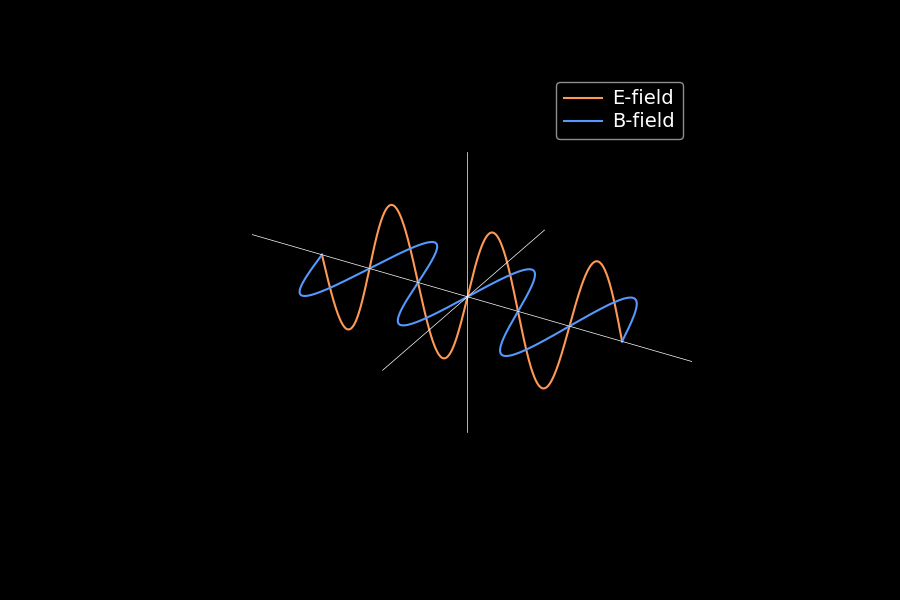

In [5]:
#| "tags": [ "hide-input",]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

amp = 0.7
kk = 2 * np.pi * 1
omega = 2 * np.pi * 1
time = 0 
x = np.linspace(-1.5, 1.5, 1000)
y = amp * np.sin(kk * x - omega * time)
z = np.zeros_like(x)

eline, = ax.plot(x, z, y, color="#ff9955", label="E-field")
bline, = ax.plot(x, y, z, color="#5599ff", label="B-field")

ax.plot(1.5*x, z, z, lw=0.5, color="white")
ax.plot(z, np.linspace(-2*amp, 2*amp, len(z)), z, lw=0.5, color="white")
ax.plot(z, z, np.linspace(-2*amp, 2*amp, len(z)), lw=0.5, color="white")

ax.set_xlim([x[0], x[-1]])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_aspect('equal')
ax.legend()
ax.set_axis_off()

def update_waves(
    time_slider_value=0, 
    amp_slider_value=0.7
):
    """
    Create waves plot with synchronized cosine and sine displays.
    """
    time = time_slider_value
    amp = amp_slider_value
    
    # Calculate sine
    newy = amp * np.sin(kk * x - omega * time)

    eline.set_data_3d(x, z, newy)
    bline.set_data_3d(x, newy, z)
    # efill = ax.fill_between(x, z, newy, x, z, z, alpha=0.3, color="#ff9955")
    # bfill = ax.fill_between(x, newy, z, x, z, z, alpha=0.3, color="#5599ff")
    
    fig.canvas.draw_idle()
    return

# Create interactive widget
time_slider = FloatSlider(
    value=0,
    min=0,
    max=3,
    step=0.01,
    description='time [s]:',
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
amp_slider = FloatSlider(
    value=amp,
    min=0,
    max=1,
    step=0.01,
    description='amplitude:',
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(update_waves, time_slider_value=time_slider, amp_slider_value=amp_slider)
plt.show()


### <span style="color: #ff5500">Generalization in three-dimensions</span>
A similar derivation can be performed for $E_y$ and $E_z$.  
We can define a wave-number vector $\mathbf{k} = \left(k_x, k_y, k_z\right)$ and a radial vector $\mathbf{r} = (x, y, z)$.\
Then $\mathbf{k} \cdot \mathbf{r} = k_x x + k_y y + k_z z$,
and we can rewrite the solution in any direction:
\begin{align}
\label{eq:efield-final}
\mathbb{E} = A e^{i (\mathbf{k} \cdot \mathbf{r} - \omega t)} + B e^{i (-\mathbf{k} \cdot \mathbf{r} - \omega t)} 
\end{align}

### Quantum Mechanics: Photons
Light is famously made of *photons*, which act as the force carriers for the electromagnetic field in the standard model.  
A photon of light carries energy $E = h \nu$ 


# Phasors and Complex Numbers



interactive(children=(FloatSlider(value=0.0, description='θ (rad):', max=6.283185307179586, readout_format='.3…

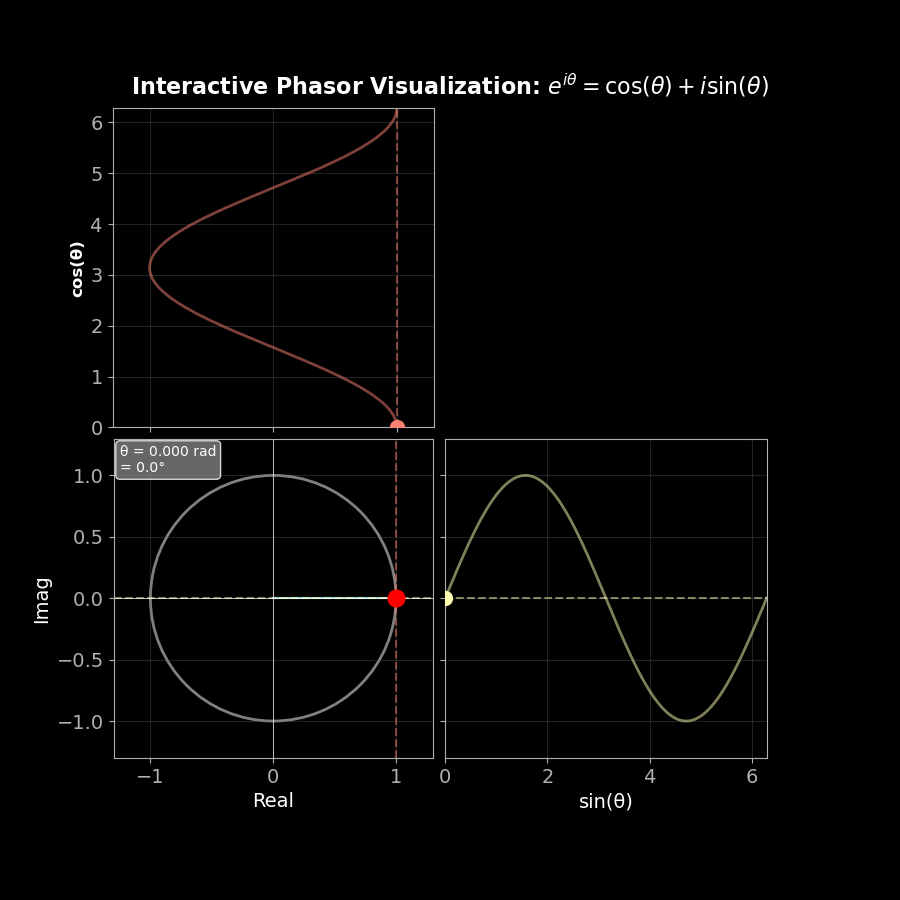

In [3]:
#| label: unit_phasor
#| "tags": [ "hide-input",]

# Create figure with custom layout
fig = plt.figure(figsize=(9, 9))
fig.set_tight_layout(False)
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 0.1], width_ratios=[1, 1, 0.1],
                      hspace=0.05, wspace=0.05)

# Create subplots
ax_cos = fig.add_subplot(gs[0, 0])      # Cosine plot (top)
ax_phasor = fig.add_subplot(gs[1, 0])  # Phasor plot (center)
ax_sin = fig.add_subplot(gs[1, 1])     # Sine plot (right)

theta = 0 # initial values

cos_val = np.cos(theta)
sin_val = np.sin(theta)

# Generate full curves
theta_range = np.linspace(0, 2*np.pi, 1000)
cos_curve = np.cos(theta_range)
sin_curve = np.sin(theta_range)

# Setup cosine plot (top)
ax_cos.plot(cos_curve, theta_range, '-', color='C3', linewidth=2, alpha=0.5)
cos_dot,     = ax_cos.plot([cos_val], [theta], 'o', color='C3', markersize=10, zorder=5)
cos_val_line = ax_cos.axvline(cos_val, color='C3', linestyle='--', alpha=0.5)

ax_cos.set_xlim(-1.3, 1.3)
ax_cos.set_ylim(0, 2*np.pi)
ax_cos.set_ylabel('cos(θ)', fontsize=12, fontweight='bold')
ax_cos.grid(True, alpha=0.3)
ax_cos.axhline(0, linewidth=0.5)
ax_cos.set_xticklabels([])

# Setup phasor plot (center)
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linewidth=2)
ax_phasor.add_patch(circle)

# Draw phasor arrow
# arrow = FancyArrowPatch((0, 0), (cos_val, sin_val),
#                        arrowstyle='->', mutation_scale=20, 
#                        linewidth=3, color='red', zorder=4)
# ax_phasor.add_patch(arrow)

phasor_line, = ax_phasor.plot([0,cos_val],[0,sin_val])
phasor_sin_line = ax_phasor.axhline(sin_val, color='C1', linestyle='--', alpha=0.5)
phasor_cos_line = ax_phasor.axvline(cos_val, color='C3', linestyle='--', alpha=0.5)
phasor_dot, = ax_phasor.plot([cos_val], [sin_val], 'ro', markersize=12, zorder=5)

ax_phasor.set_xlim(-1.3, 1.3)
ax_phasor.set_ylim(-1.3, 1.3)
ax_phasor.set_aspect('equal')
ax_phasor.axhline(0, linewidth=0.5)
ax_phasor.axvline(0, linewidth=0.5)
ax_phasor.set_xlabel('Real')
ax_phasor.set_ylabel('Imag')
ax_phasor.grid(True, alpha=0.3)
# ax_phasor.set_title('Phasor: $e^{i\\theta}$', fontsize=14, pad=10, fontweight='bold')

# Add text annotation
ax_phasor.text(0.02, 0.98, f'θ = {theta:.3f} rad\n= {np.degrees(theta):.1f}°',
               transform=ax_phasor.transAxes, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='grey', alpha=0.8),
               fontsize=10)

# Setup sine plot (right)
ax_sin.plot(theta_range, sin_curve, color="C1", linewidth=2, alpha=0.5)
sin_dot, = ax_sin.plot([theta], [sin_val], 'o', color="C1", markersize=10, zorder=5)
sin_val_line = ax_sin.axhline(sin_val, color='C1', linestyle='--', alpha=0.5)
ax_sin.set_xlim(0, 2*np.pi)
ax_sin.set_ylim(-1.3, 1.3)
ax_sin.set_xlabel('sin(θ)')
# ax_sin.set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax_sin.set_yticklabels([])
ax_sin.grid(True, alpha=0.3)
ax_sin.axvline(0, color='k', linewidth=0.5)

plt.suptitle('Interactive Phasor Visualization: $e^{i\\theta} = \\cos(\\theta) + i\\sin(\\theta)$', 
             fontsize=16, y=0.92, fontweight='bold')

# plt.tight_layout()
# plt.show()

def update_phasor(theta_slider_value=1):
    """
    Create phasor plot with synchronized cosine and sine displays.
    
    Parameters:
    -----------
    theta : float
        Angle in radians (0 to 2π)
    """
    theta = theta_slider_value
    
    # Calculate phasor components
    cos_val = np.cos(theta)
    sin_val = np.sin(theta)

    cos_dot.set_xdata([cos_val])
    cos_dot.set_ydata([theta])
    cos_val_line.set_xdata([cos_val,cos_val])

    phasor_line.set_xdata([0,cos_val])
    phasor_line.set_ydata([0,sin_val])
    phasor_sin_line.set_ydata([sin_val, sin_val])
    phasor_cos_line.set_xdata([cos_val, cos_val])
    phasor_dot.set_xdata([cos_val])
    phasor_dot.set_ydata([sin_val])

    sin_dot.set_xdata([theta])
    sin_dot.set_ydata([sin_val])
    sin_val_line.set_ydata([sin_val,sin_val])

    # fig.canvas.draw()
    # fig.canvas.flush_events()
    fig.canvas.draw_idle()
    return

# Create interactive widget
theta_slider = FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ (rad):',
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(update_phasor, theta_slider_value=theta_slider)
plt.show()

```{exercise}
:label: complex-ii

Using Euler's formula, calculate $i^i$.
```

```{solution} complex-ii
:label: complex-ii-solution
:class: dropdown

First, we express $i$ in terms of an exponential.
Starting with 
\begin{align}
e^{i \theta} = \cos(\theta) + i \sin(\theta)
\end{align}
we see that we get a purely imaginary expression when $\theta = \dfrac{\pi}{2}$.

This gives us $i = e^{i \frac{\pi}{2}}$

Now, $i^i$ can be rewritten as 
$$i^i = \left(e^{i \frac{\pi}{2}}\right)^i = e^{i \frac{\pi}{2} \cdot i } = e^{-\frac{\pi}{2} }$$
```

# Test

[](#unit_phasor) - This is a cross-reference to a notebook cell

# Test 2

![](#unit_phasor)